In [9]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from pandemic_flu_spread.pandemic_classes import PandemicSim
import matplotlib.pyplot as plt
import seaborn as sns
from base import ROOT_DIR

sns.set_style("darkgrid")
plots_folder = ROOT_DIR / "pandemic_flu_spread/plots"

# Pandemic Flu Spread

## 1 - Approach to solving the problem
In this problem, the event that a kid gets infected by another kid is defined by a
Bernoulli trial. Since we have i.i.d Bernoulli trials with 20 susceptible kids and a
probability of infection of 0.02, the number of kids that could get infected by a single
kid is a Binomial distribution.

Taking the example of Tommy on the first day of the simulation, the distribution of
kids that Tommy infects on day 1 is defined by the following:

$$ Pr(X = k)  =  {{n}\choose{k}} \cdot p^kq^{n-k}$$

for k = 0, 1, 2, …, n, where n = 20 and p = 0.02

This results in the following Binomial distribution of infected kids on day one:

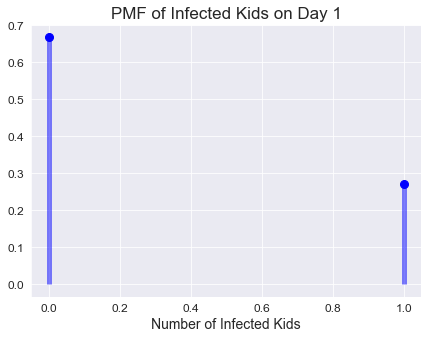

In [17]:
n, p = 20, 0.02

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.set_title("PMF of Infected Kids on Day 1", fontsize=17)
ax.set_xlabel("Number of Infected Kids", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(plots_folder / "pmf_infected_day_one.svg")
plt.show()

This implies that Tommy can only infect at most one kid on the first day but there is a
higher probability that he does not infect any:

In [3]:
print(binom.pmf(0, n, p))

0.6676079717550946


Thus the expected number of infected kids

In [4]:
print(binom.expect(args=(n, p)))

0.39999999999999974


## 2 - Sample simulation run

Day 3: st_18 was infected by st_21!!
Day 4: st_21 has recovered!!
Day 4: st_12 was infected by st_18!!
Day 5: st_17 was infected by st_18!!
Day 5: st_8 was infected by st_17!!
Day 5: st_16 was infected by st_17!!
Day 7: st_18 has recovered!!
Day 6: st_15 was infected by st_8!!
Day 7: st_5 was infected by st_12!!
Day 8: st_12 has recovered!!
Day 7: st_2 was infected by st_8!!
Day 8: st_8 has recovered!!
Day 9: st_17 has recovered!!
Day 9: st_15 has recovered!!
Day 10: st_16 has recovered!!
Day 10: st_2 has recovered!!
Day 11: st_6 was infected by st_5!!
Day 11: st_19 was infected by st_5!!
Day 12: st_5 has recovered!!
Day 12: st_11 was infected by st_6!!
Day 13: st_9 was infected by st_19!!
Day 14: st_19 has recovered!!
Day 13: st_14 was infected by st_9!!
Day 15: st_6 has recovered!!
Day 16: st_9 has recovered!!
Day 17: st_11 has recovered!!
Day 18: st_14 has recovered!!
Day 17: Pandemic is over!!!
Day 18: Pandemic is over!!!
Day 19: Pandemic is over!!!
Day 20: Pandemic is over!!!


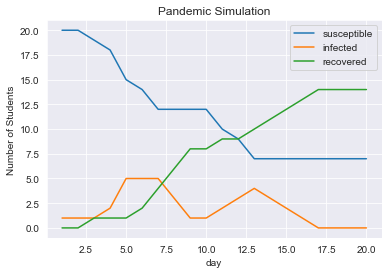

In [13]:
run_params = dict(days=20,
                  susceptible_students=20,
                  infected_students=1,
                  probability_infection=0.02,
                  days_to_recover=3)

single_sim_results = PandemicSim.run_sim_with(**run_params, debug=True)
_ = single_sim_results.plot()
plt.title("Pandemic Simulation")
plt.ylabel("Number of Students")
plt.show()

## 3 - Get the expected values with several simulations trials

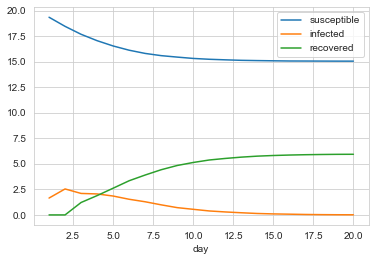

In [6]:
results = PandemicSim.run_sims_with(trials=1000,
                                    days=20,
                                    susceptible_students=20,
                                    infected_students=1,
                                    probability_infection=0.02,
                                    days_to_recover=3)
_ = results.plot()